In [15]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

from data import harmonic_oscillator_solution
from lossfn import mse
from model import FCN

# Train NN to simulate the Harmonic Oscillator system.

In this notebook we attempt to estimate the solution to a Harmonic oscillator system (see the data notebook).

## Inputs
- The data

## Outputs
- Estimation of the solution, eg. $x(t)$

## Approach

The NN model is trained to approximate the solution to the DE, i.e.:

$$
x_{NN}(t,\theta) \approx u(t)~,
$$
Where $\theta$ are the parameters to train.

We will be using a fully connected net

The cost function will just be a simple MSE

In [16]:
def plot_result(x,y,x_data,y_data,yh, title=None):

    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.plot(x,y, color="tab:grey", alpha=0.6, label="Exact solution")
    plt.plot(x,yh, color="tab:green", label="Neural network prediction")
    plt.scatter(x_data, y_data, label='Training data')
    l = plt.legend(loc='best')

In [17]:
data = pd.read_csv('./time-oscillation.csv', dtype=np.float32)

d, w0 = 2, 20
t_true = torch.linspace(0,1,500).view(-1,1)
obs_true = harmonic_oscillator_solution(d, w0, t_true)

t_data = torch.tensor(data['t'][::20].values).view(-1,1)
obs_data = torch.tensor(data['observation'][::20].values).view(-1,1)

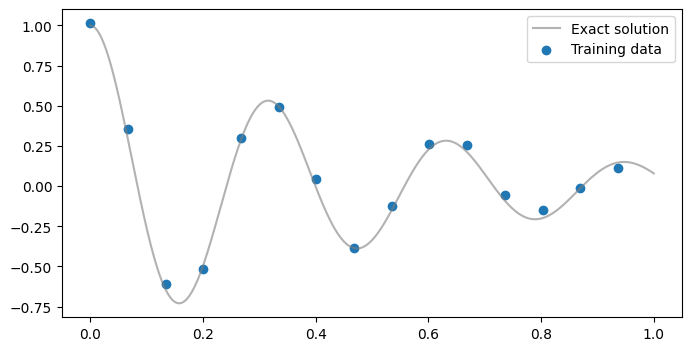

In [18]:
plt.figure(figsize=(8,4))
plt.plot(t_true, obs_true.view(-1,1), color="tab:grey", alpha=0.6, label="Exact solution")
plt.scatter(t_data, obs_data, label="Training data")
plt.legend()
plt.show()

In [19]:
# torch.manual_seed(123)
model = FCN(N_INPUT=1, N_OUTPUT=1, N_HIDDEN=32, N_LAYERS=3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
files = []
for i in range(15001):
    optimizer.zero_grad()
    yh = model(t_data)
    loss = mse(yh, obs_data) # use mean squared error
    loss.backward()
    optimizer.step()

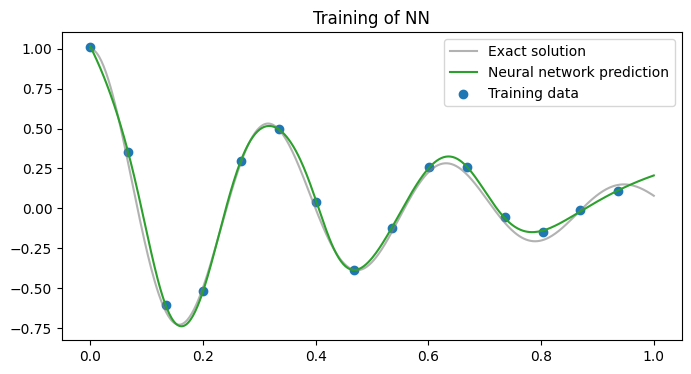

In [20]:
yh = model(t_true).detach()

mse_nn = mse(obs_true, yh)
plot_result(t_true,obs_true,t_data,obs_data,yh, title=f'Training of NN')

In [21]:
np.mean((harmonic_oscillator_solution(d=2, w0=20, t=t_true) - model(t_true)).detach().numpy())**2

0.0004342035309621607